# Collaborative Filtering with Matrix Factorization: Searching for Optimum Number of Components
---  

## Concept
(Non-negative) Matrix Factorization (or Approximation) is a model based collaborative filtering technique
non-negative ➜ because all elements of the matrix are generally positive or zero
matrix factorization ➜ because a large (and sparse) matrix containing all user and rating information is divided into two much smaller matrices/factors

In non-negative matrix factorization, we are trying to factorise (separate) the rating matrix into two matrices, for users and for films separately, each of which also has latent features in the hidden axis. The sub-matrices are found so that their product approximates ratings matrix R.

<!-- <img src="nmf.png" width="600" height="400"> -->

## Your task
Complete the NMF worksheet
[Course Materials](https://spiced.space/gradient-masala/ds-course/chapters/project_movie_recommender/model_based_cf.html)

## Coding

In [ ]:
# !pip install scikit-surprise

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # from surprise import SVD, Dataset, Reader
# from surprise.accuracy import rmse

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.decomposition import NMF
import pickle

#### Let's collect some recommendations for a new users that loves Disney Movies!

## Non Negative Matrix Factorization for Recommender Systems
---



In [ ]:
ratings = pd.read_csv('/content/capston-project/data/ratings.csv')
# movies = pd.read_csv('data/ml-latest-small/movies.csv')

In [ ]:
# ratings.movieId.nunique(), movies.movieId.nunique()

In [ ]:
# # which movies are in the query?
# movies.set_index('movieId').loc[query.keys()]

---
## 1. Model Development

### Preprocessing

- create a sparse user item matrix

In [ ]:
# A csr_matrix (Compressed Sparse Row matrix) is a type of sparse matrix from the scipy.sparse library that is used to store large, sparse matrices efficiently by only keeping track of non-zero elements.
# Initialize a sparse user-item rating matrix
# (data, (row_ind, col_ind))
# csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
# where data, row_ind and col_ind satisfy the relationship a[row_ind[k], col_ind[k]] = data[k].

R=csr_matrix((ratings['rating'], (ratings['userId'], ratings['movieId'])))

In [ ]:
#

In [ ]:
# shape, number of enteries, and number of nonzero enteries of R matrix
R.shape, R.shape[0] * R.shape[1] , np.count_nonzero(R.toarray())

((611, 193610), 118295710, 100836)

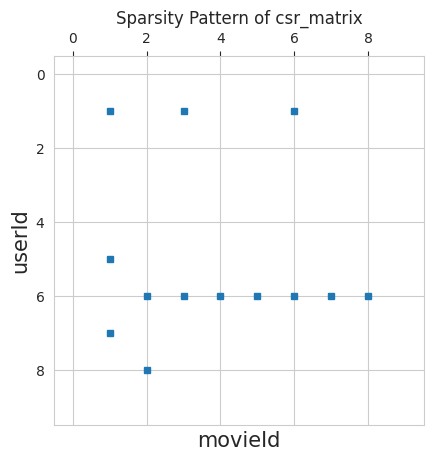

In [ ]:
# plotting part of the R matrix
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.spy(R[:10,:10], markersize=5)
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xlabel("movieId", fontsize=15)
plt.ylabel("userId", fontsize=15)

plt.title("Sparsity Pattern of csr_matrix")
plt.show()

### Training and Finding the Optimized Hyperparameters

- initialize the model
- fit it on the user item matrix
- optionally, tune the number of components (hidden features): what happens if you set the number of components to a really low number?
- decrease the `tol` to train for a longer time

In [ ]:
n_components = [i for i in range(100, 310, 10)]
n_components

[100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300]

In [ ]:

# defining rmse list
rmse_ = []
for n_com in n_components:
    print(f'n_component = {n_com}')
# initialize the unsupervised model

# 55 hidden features or factors, F=55
    model = NMF(n_components = n_com, init='nndsvd', max_iter=10000, tol=0.01, verbose=1)

# fit it to the user-item rating matrix
    model.fit(R)
    # user-'genre' matrix [611x55]
    # P =model.transform(R)

# movie-'genre' matrix [55x168253]
    # Q = model.components_

    # R_hat = model.inverse_transform(model.transform(R))

    # reconstruction error
    # np.sqrt(np.sum(np.square(R - R_hat)))
    rmse_.append(model.reconstruction_err_)
# initialzed P, Q matrix with random values
# iterate and optimize the values stored in P and Q

n_component = 100
violation: 1.0
violation: 0.22394353639761616
violation: 0.14280002259226235
violation: 0.10816534389767045
violation: 0.08091823037336392
violation: 0.06388788738437587
violation: 0.051027531931159775
violation: 0.04125560301046326
violation: 0.03441227202998602
violation: 0.02943911750133972
violation: 0.025676360614217335
violation: 0.02245654017107039
violation: 0.01955857637354803
violation: 0.01751648618513464
violation: 0.01614032093876985
violation: 0.015360275587121894
violation: 0.015056786902790713
violation: 0.014978555005241586
violation: 0.014665723599995064
violation: 0.014019447790432354
violation: 0.013232504241267859
violation: 0.01246226608854099
violation: 0.011539050260875561
violation: 0.010422781913424462
violation: 0.009368661993693909
Converged at iteration 26
n_component = 110
violation: 1.0
violation: 0.21081659681789655
violation: 0.12859868803880087
violation: 0.09496036544387915
violation: 0.0739527380581909
violation: 0.05904385266937122

### Model inspection

In [ ]:
rmse_tol_01 = rmse_
rmse_tol_01

[658.2351932513068,
 641.348096045699,
 620.9354117965493,
 600.9434236707913,
 587.3451839139395,
 571.0762703661674,
 557.3093060156368,
 538.6752557067521,
 523.6904888345824,
 515.842160913394,
 498.2843731128405,
 485.1063510294601,
 472.3051489364975,
 460.96590725276724,
 452.0422033843948,
 442.0910700976606,
 424.75619611723255,
 424.90854088473066,
 414.60537307889143,
 411.3823139514559,
 399.886251475886]

In [ ]:
# rmse_tol_01 = [658.2351932513068,
#  641.348096045699,
#  620.9354117965493,
#  600.9434236707913,
#  587.3451839139395,
#  571.0762703661674,
#  557.3093060156368,
#  538.6752557067521,
#  523.6904888345824,
#  515.842160913394,
#  498.2843731128405,
#  485.1063510294601,
#  472.3051489364975,
#  460.96590725276724,
#  452.0422033843948,
#  442.0910700976606,
#  424.75619611723255,
#  424.90854088473066,
#  414.60537307889143,
#  411.3823139514559,
#  399.886251475886]

In [ ]:
# rmse_tol_02 = [663.8693689825453,
#  646.8953943791491,
#  629.1199973684813,
#  608.8937239783711,
#  598.2976845071596,
#  577.5814944632474,
#  569.6786984822061,
#  554.054541803524,
#  539.1955754781206,
#  524.8341012589198,
#  516.0439304588818,
#  508.02175151251197,
#  497.06225942037906,
#  486.64485541202885,
#  467.7769529314847,
#  464.979694006649,
#  465.27006741922946,
#  454.4148772925512,
#  444.4872761758428,
#  441.04968082884204]

In [ ]:
len(n_components), len(rmse_tol_02)

(21, 20)

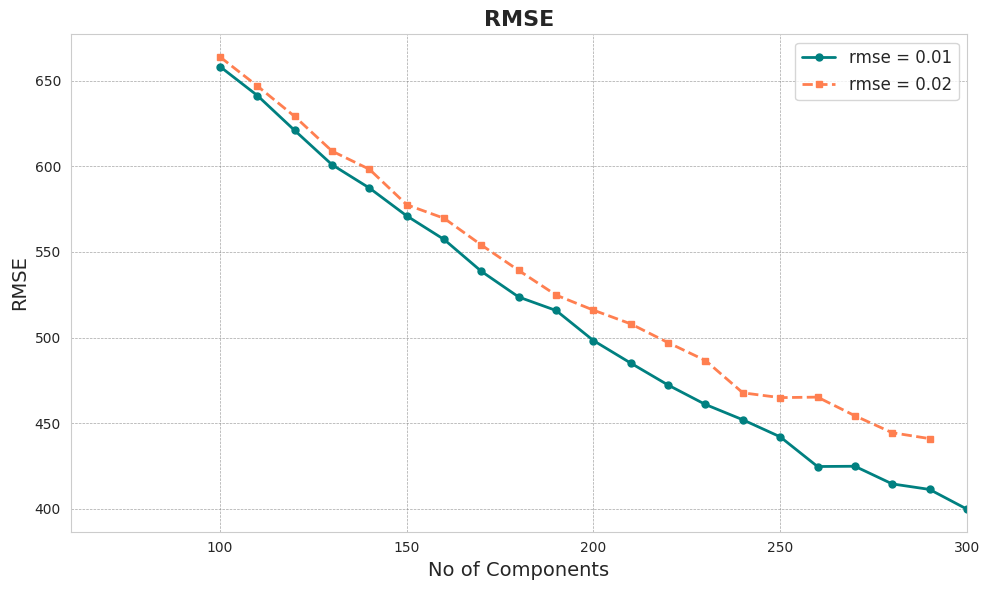

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 50)  # 50 points from 0 to 10
y1 = np.sin(x)              # First line data
y2 = np.cos(x)              # Second line data

# Create the plot
plt.figure(figsize=(10, 6))

# Plot first line with customizations
plt.plot(n_components, rmse_tol_01, color="teal", linewidth=2, linestyle='-', marker='o', markersize=5, label="rmse = 0.01")

# Plot second line with customizations
plt.plot(n_components[:-1], rmse_tol_02, color="coral", linewidth=2, linestyle='--', marker='s', markersize=5, label="rmse = 0.02")

# Add title and labels
plt.title("RMSE", fontsize=16, fontweight='bold')
plt.xlabel("No of Components", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

# Add grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
plt.legend(fontsize=12, loc="upper right")

# Optional: Fine-tune the x and y axis limits
plt.xlim(60, 300)
# plt.ylim(-1.5, 1.5)

# Display the plot
plt.tight_layout()
plt.savefig('NMF_rmse_n_component')
plt.show()